In [1]:
# Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

!pip install fancyimpute
from fancyimpute import KNN
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer as MICE

import scipy.stats as stats
from scipy.stats import norm, uniform, expon
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif


##Installing all the required libraries for AutoML Modelling
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

# Importing all the libararies required for AutoML Modelling
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil




In [2]:
df_train = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")

In [3]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
categorical_columns = [col for col in df_train.columns if df_train[col].dtype == "object"]
print("Categorical Columns : ", categorical_columns)

numerical_columns = [col for col in df_train.columns if col not in categorical_columns]
print("Numerical Columns : ", numerical_columns)

Categorical Columns :  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Columns :  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


Question 1. What are the data types? (Only numeric and categorical)

-> Categorical Features:

*   Item_Identifier
*   Item_Fat_Content
*   Item_Type
*   Outlet_Identifier
*   Outlet_Size
*   Outlet_Location_Type
*   Outlet_Type

-> Numerical Features:

*   Item_Weight
*   Item_Visibility
*   Item_MRP
*   Outlet_Establishment_Year
*   Item_Outlet_Sales



In [7]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Question 2. Are there missing values?

Answer:

The Training data and Testing data have few missing values.

-- Columns that have null values:

* Item_Weight

* Outlet_Size


Question 3. What are the likely distributions of the numeric variables?

Answer:
As per the below

The likely distributions are:

* Item_Weight : Normal Distribution
* Item_Visibility : Exponential Distribution
* Item_MRP : Uniform Distribution
* Outlet_Establishment_Year: Uniform Distribution
* Item_Outlet_Sales : Exponential Distribution

Question 10. What are the distributions of the predictor variables?

Answer:

* Below are the snapshots:

Text(0.5, 0, 'Item_Weight')

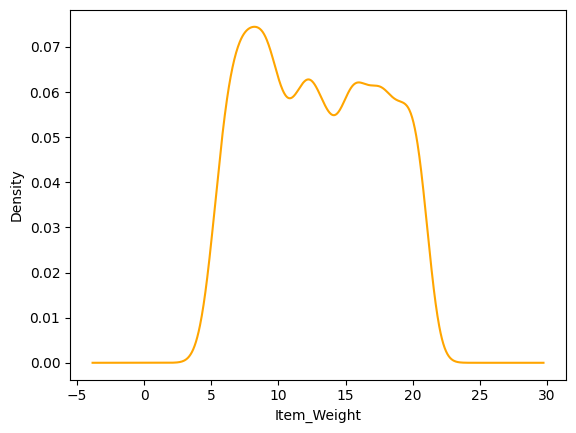

In [9]:
# Plotting the distribution of Item_Weight (indefinite data)
df_train.Item_Weight.plot.density(color="Orange")
plt.xlabel("Item_Weight")

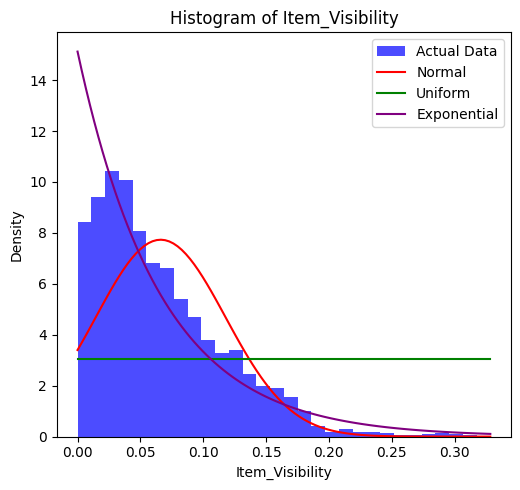

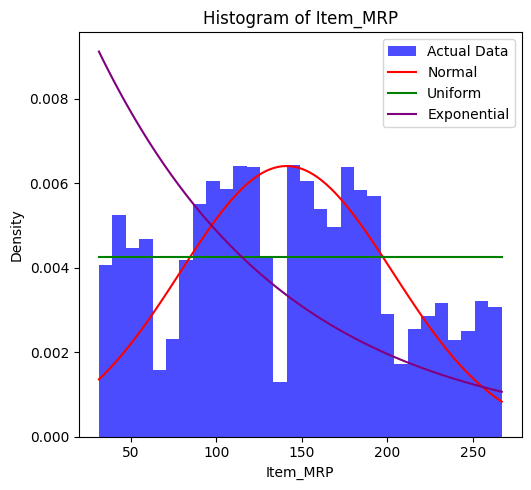

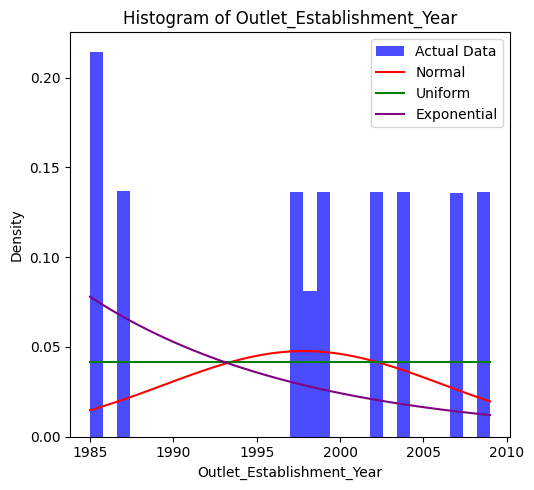

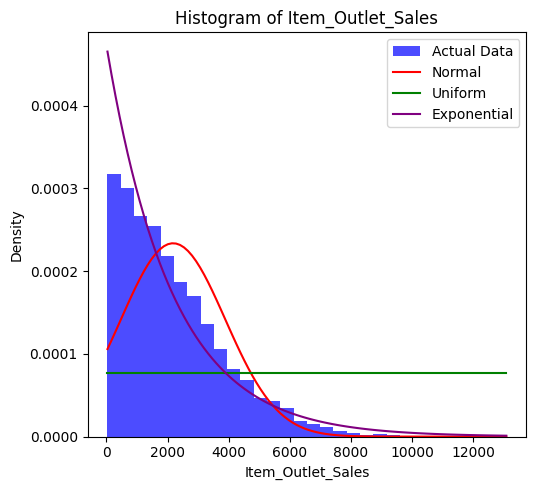

In [10]:
def plot_distributions(data, column_name):
    # Fit different distributions
    normal_params = norm.fit(data)
    uniform_params = uniform.fit(data)
    exponential_params = expon.fit(data)

    # Plot the histograms and fitted distributions
    plt.figure(figsize=(10, 5))

    # Plot histogram of actual data
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=30, density=True, alpha=0.7, color='blue', label='Actual Data')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')

    # Plot the fitted distributions
    x = np.linspace(min(data), max(data), 100)
    plt.plot(x, norm.pdf(x, *normal_params), label='Normal', color='red')
    plt.plot(x, uniform.pdf(x, *uniform_params), label='Uniform', color='green')
    plt.plot(x, expon.pdf(x, *exponential_params), label='Exponential', color='purple')

    # Adjust layout
    plt.tight_layout()
    plt.legend()
    plt.show()


# Item_Visibility
item_visibility = df_train["Item_Visibility"].values
plot_distributions(item_visibility, "Item_Visibility")

# Item_MRP
item_mrp = df_train["Item_MRP"].values
plot_distributions(item_mrp, "Item_MRP")

# Outlet_Establishment_Year
item_mrp = df_train["Outlet_Establishment_Year"].values
plot_distributions(item_mrp, "Outlet_Establishment_Year")

# Item_Outlet_Sales
item_mrp = df_train["Item_Outlet_Sales"].values
plot_distributions(item_mrp, "Item_Outlet_Sales")

<Axes: xlabel='Item_Weight'>

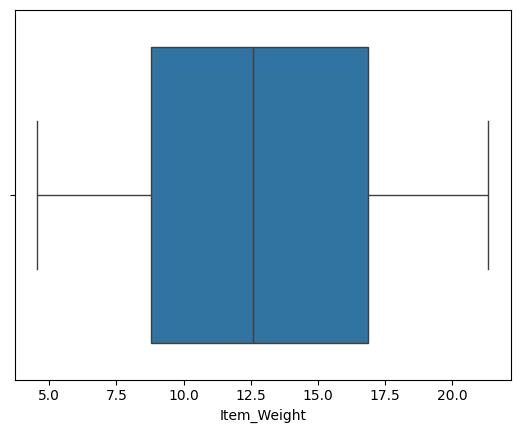

In [11]:
sns.boxplot(x=df_train["Item_Weight"])

<Axes: xlabel='Item_Visibility'>

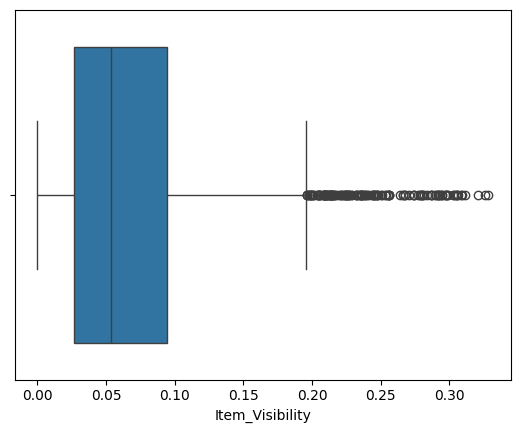

In [12]:
sns.boxplot(x=df_train["Item_Visibility"])

<Axes: xlabel='Item_MRP'>

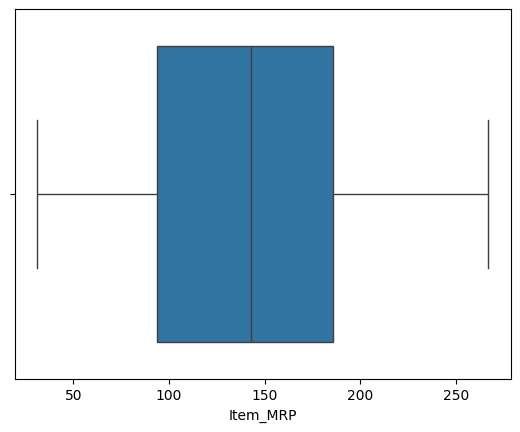

In [13]:
sns.boxplot(x=df_train["Item_MRP"])

<Axes: xlabel='Outlet_Establishment_Year'>

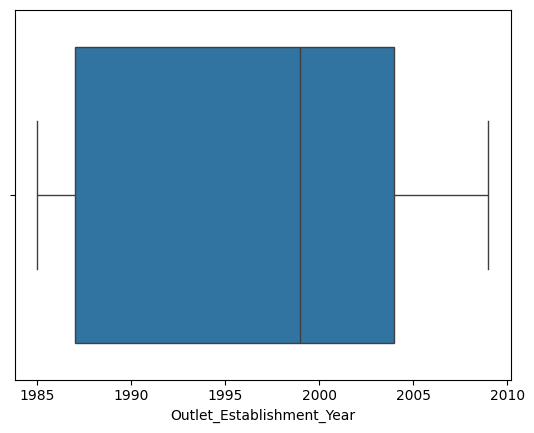

In [14]:
sns.boxplot(x=df_train["Outlet_Establishment_Year"])

<Axes: xlabel='Item_Outlet_Sales'>

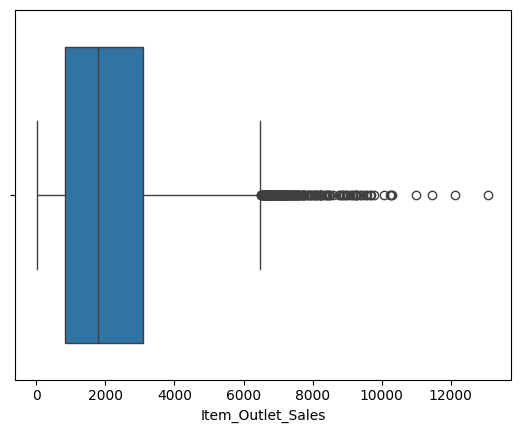

In [15]:
sns.boxplot(x=df_train["Item_Outlet_Sales"])

Note:

* Item_Visibility and Item_Outlet_Sales have Outliers.

Question 7. In the predictor variables independent of all the other predictor variables?

Answer:

* As we can see in the above pair-plot, there is no significant collinearity between any features and they are mostly in-dependent of each other.

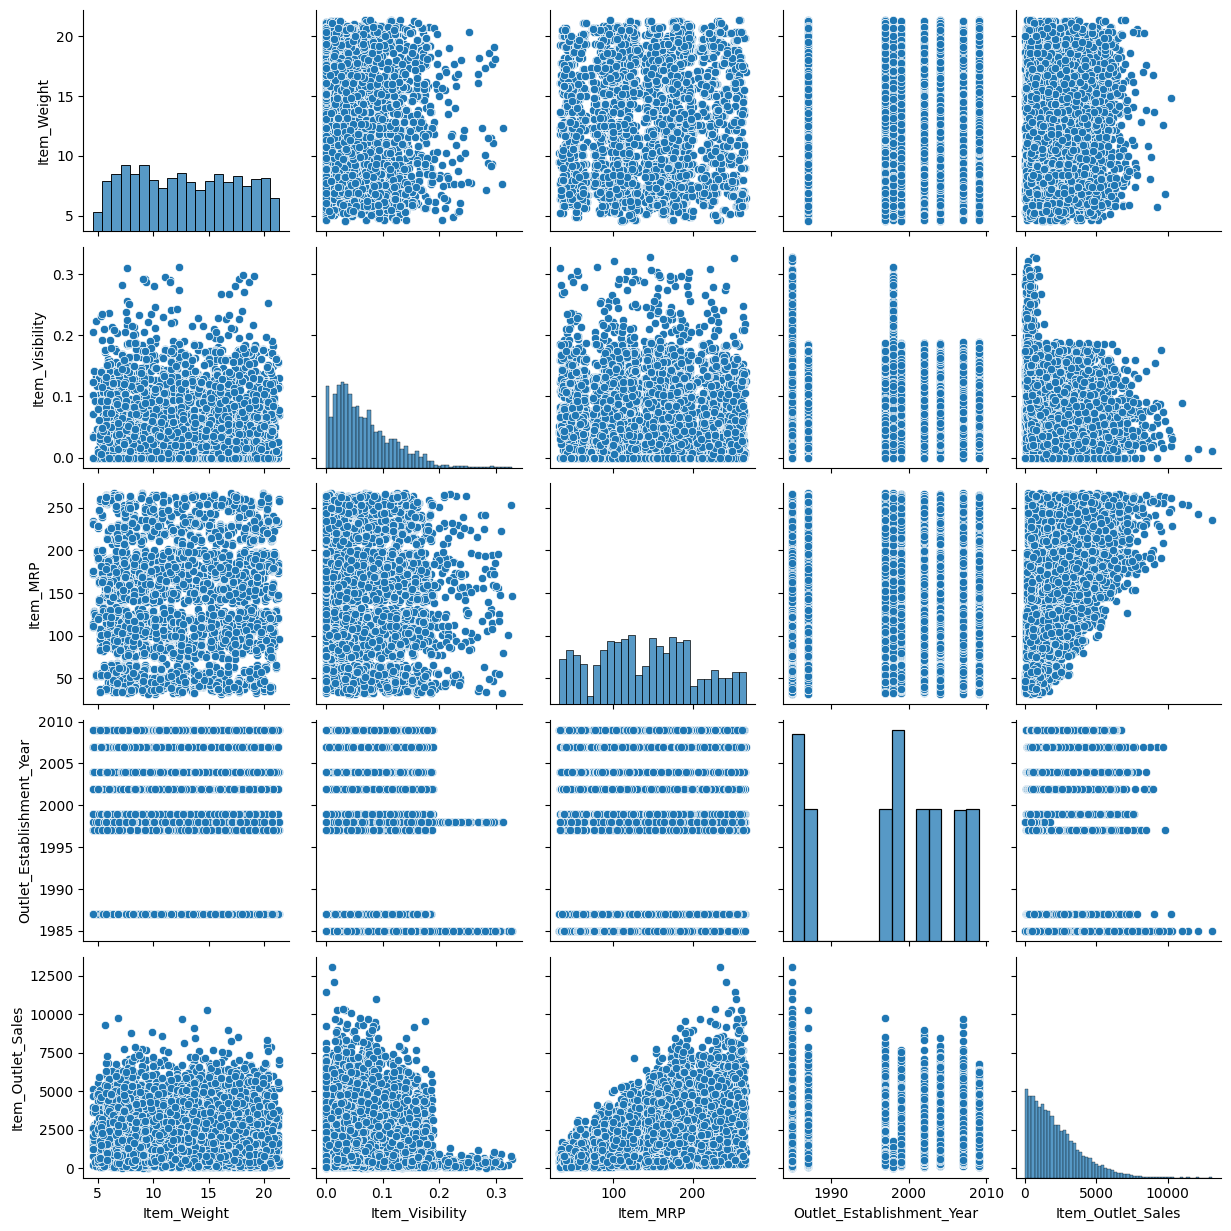

In [16]:
sns.pairplot(df_train)

In [17]:
#Unique Values of Item_Fat_Content

print("Unique values (train):", df_train['Item_Fat_Content'].unique())
print("Unique values (test) :", df_test['Item_Fat_Content'].unique())

Unique values (train): ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Unique values (test) : ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


In [18]:
df_train["Item_Fat_Content"] = df_train["Item_Fat_Content"].replace(
    {"LF": "low fat", "Low Fat": "low fat", "reg": "regular","Regular": "regular"}
)

df_test["Item_Fat_Content"] = df_test["Item_Fat_Content"].replace(
    {"LF": "low fat", "Low Fat": "low fat", "reg": "regular","Regular": "regular"}
)

In [19]:
print("Unique values (train):", df_train['Item_Fat_Content'].unique())
print("Unique values (test) :", df_test['Item_Fat_Content'].unique())

Unique values (train): ['low fat' 'regular']
Unique values (test) : ['low fat' 'regular']


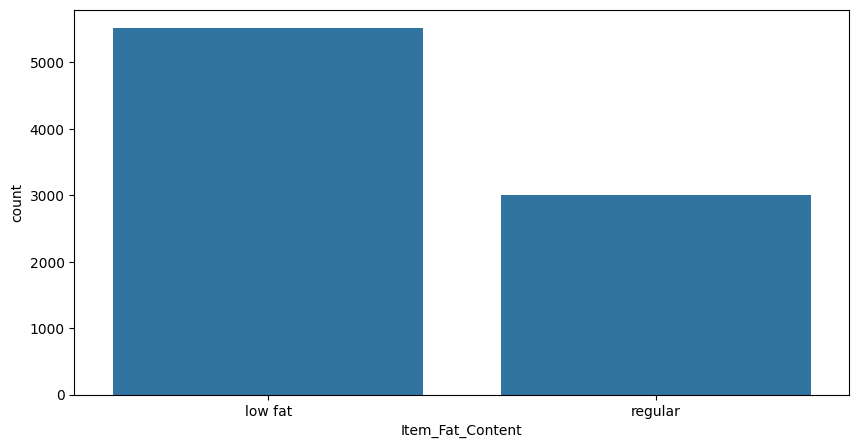

In [20]:
#Plot countplot for Item_Fat_Content column
plt.figure(figsize=(10,5))
sns.countplot(x= "Item_Fat_Content" , data=df_train)
plt.show()

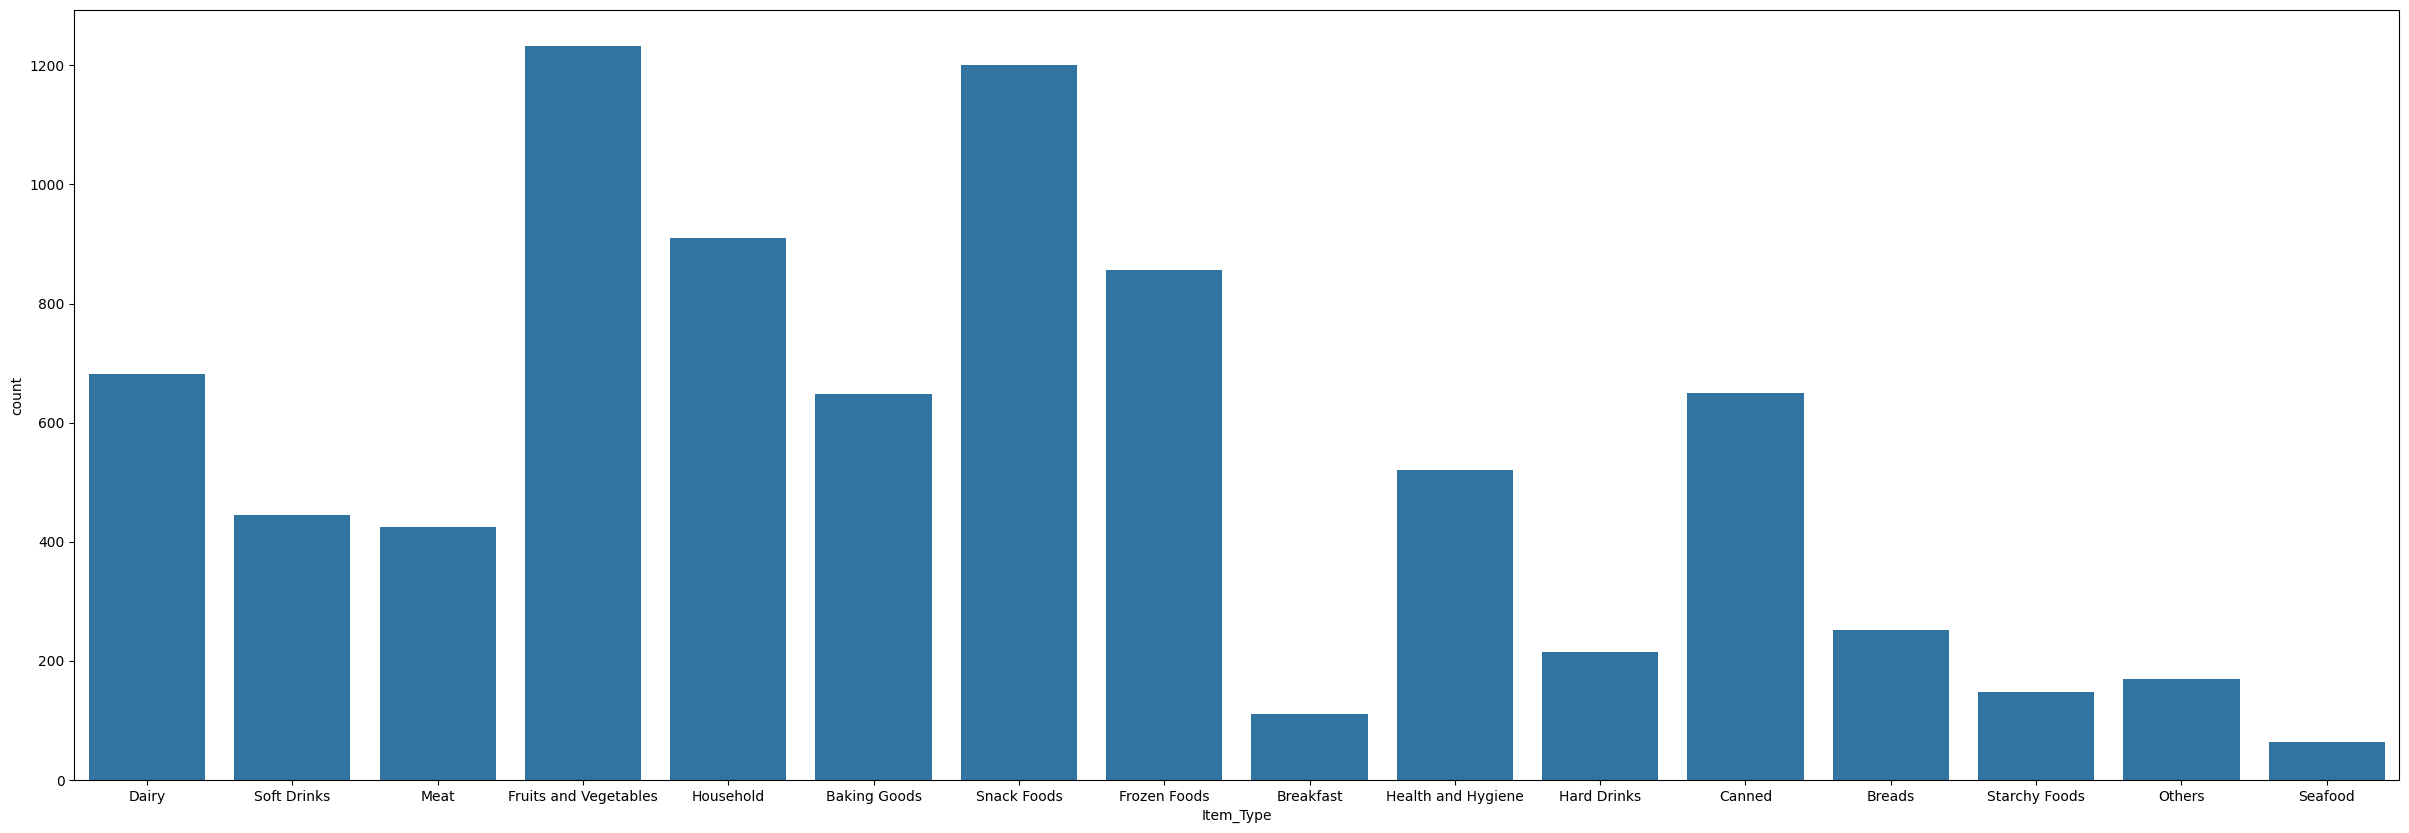

In [21]:
#Plot countplot for Item_Type column
plt.figure(figsize=(30,10))
sns.countplot(x= "Item_Type" , data=df_train)
plt.show()

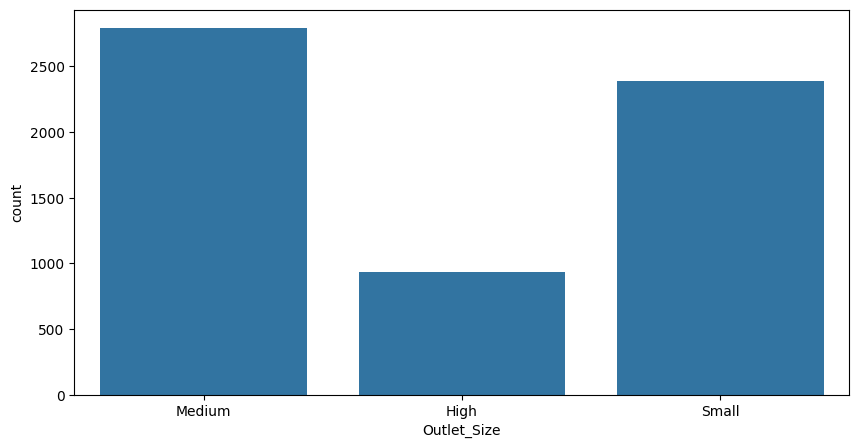

In [22]:
#Plot countplot for Outlet_Size column
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Size" , data=df_train)
plt.show()


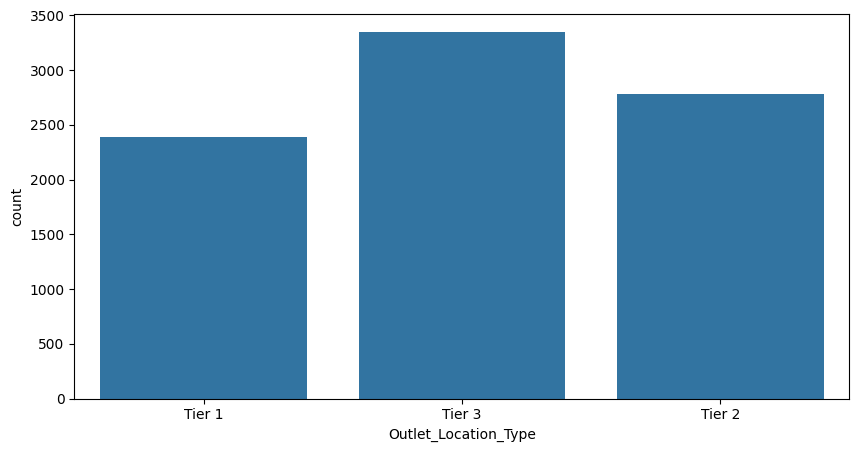

In [23]:
#Plot countplot for Outlet_Location_Type column
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Location_Type" , data=df_train)
plt.show()

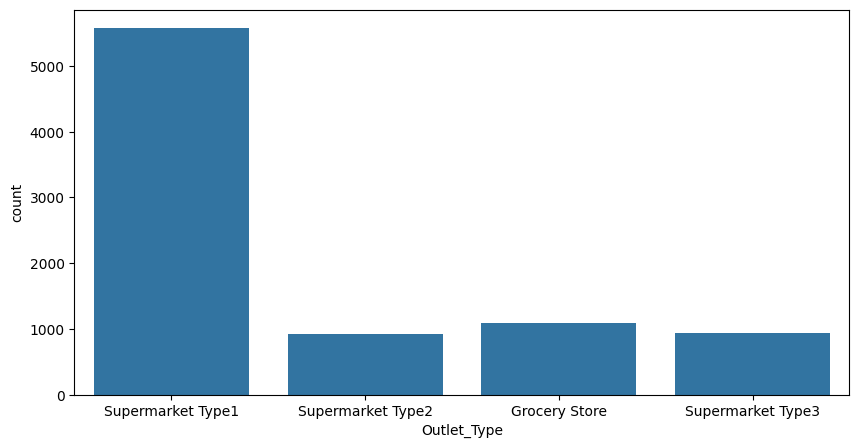

In [24]:
#Plot countplot for Outlet_Type column
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Type" , data=df_train)
plt.show()

Question 5. Which independent variables have missing data? How much?

Answer:

In [25]:
total=df_train.isnull().sum()
percent=(df_train.isnull().sum()/df_train.isnull().count()*100)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Item_Identifier,0,0.000000
Item_Weight,1463,17.165317
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Size,2410,28.276428
Outlet_Location_Type,0,0.000000


In [26]:
total=df_test.isnull().sum()
percent=(df_test.isnull().sum()/df_test.isnull().count()*100)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Item_Identifier,0,0.000000
Item_Weight,976,17.180074
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Size,1606,28.269671
Outlet_Location_Type,0,0.000000


Question 6.  Do the training and test sets have the same data?

Answer: The provided code checks each row in the testing dataset to determine if it exists in the training dataset. The result of this check is a list of Boolean values. In this specific case, we observe that all 8,523 data points in the testing dataset are marked as "False." This result indicates that every data point in the training dataset and testing dataset is unique, with no overlapping or duplicate entries between the two sets.

In [27]:
# Return False if Training and Testing data is completely seperate, orelse returns True
check_df = pd.merge(
    df_train,
    df_test,
    on=[
        "Item_Identifier",
        "Item_Weight",
        "Item_Fat_Content",
        "Item_Visibility",
        "Item_Type",
        "Item_MRP",
        "Outlet_Identifier",
        "Outlet_Establishment_Year",
        "Outlet_Size",
        "Outlet_Location_Type",
        "Outlet_Type",
    ],
    how="left",
    indicator="Exist",
)
check_df.drop("Item_Outlet_Sales", inplace=True, axis=1)
check_df["Exist"] = np.where(check_df.Exist == "both", True, False)
print(
    check_df["Exist"].value_counts()
)  # This code prints the number of unique data rows in training colomns

False    8523
Name: Exist, dtype: int64


Question 9.  Do the ranges of the predictor variables make sense?

Answer:

* In the provided table, it's evident that the variables exhibit a wide range of values, with some having significantly different scales. For instance, the mean values of variables like Item_Weight, Item_Visibility, and Item_MRP vary considerably, spanning from values in the tens to decimals.

* Min-max scaling is used  which transforms the ranges of predictor variables to fall within the (0-1) range. By applying this scaling technique, the variables values are rescaled in a way that preserves their relationships while bringing them to a more uniform and interpretable scale.

* This scaling approach helps ensure that the variable ranges align and facilitates more meaningful comparisons and analyses across different features. It is a valuable step in preparing the data for modeling, as it can contribute to improved model performance and interpretability, especially when dealing with features of varying magnitudes.

In [28]:
# Statistical Summary of Training Dataset
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Performing Imputations for missing data:

In [29]:
# Initializing objects
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
imputer = KNN()

In [30]:
# function to encode non-null data and replace it in the original data
def encode(data):
    # retains only non-null values
    nonulls = np.array(data.dropna())
    # reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1, 1)
    # encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    # Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

In [31]:
def knn_impute(df_train):
    for i in categorical_columns:
        encode(df_train[i])
    knn_impute_df_train = pd.DataFrame(
        (imputer.fit_transform(df_train)), columns=df_train.columns
    )
    knn_impute_df_train["Outlet_Size"] = knn_impute_df_train["Outlet_Size"].round()
    return knn_impute_df_train

In [32]:
# Performing imputation on training and testing data using KNN imputation
knn_impute_df_train = knn_impute(df_train)
knn_impute_df_test = knn_impute(df_test)

Imputing row 1/8523 with 0 missing, elapsed time: 18.501
Imputing row 101/8523 with 1 missing, elapsed time: 18.510
Imputing row 201/8523 with 1 missing, elapsed time: 18.517
Imputing row 301/8523 with 1 missing, elapsed time: 18.524
Imputing row 401/8523 with 1 missing, elapsed time: 18.531
Imputing row 501/8523 with 1 missing, elapsed time: 18.537
Imputing row 601/8523 with 0 missing, elapsed time: 18.545
Imputing row 701/8523 with 1 missing, elapsed time: 18.551
Imputing row 801/8523 with 0 missing, elapsed time: 18.557
Imputing row 901/8523 with 1 missing, elapsed time: 18.564
Imputing row 1001/8523 with 1 missing, elapsed time: 18.571
Imputing row 1101/8523 with 1 missing, elapsed time: 18.580
Imputing row 1201/8523 with 0 missing, elapsed time: 18.588
Imputing row 1301/8523 with 0 missing, elapsed time: 18.595
Imputing row 1401/8523 with 1 missing, elapsed time: 18.601
Imputing row 1501/8523 with 0 missing, elapsed time: 18.608
Imputing row 1601/8523 with 1 missing, elapsed time:

In [33]:
print(knn_impute_df_train.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


Text(0.5, 0, 'Item Weight')

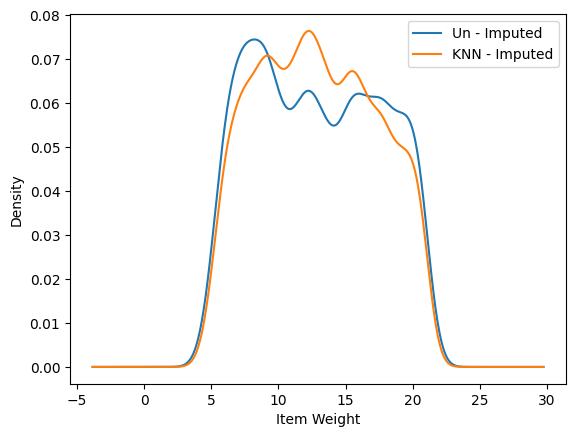

In [34]:
df_train.Item_Weight.plot(kind="kde")
knn_impute_df_train.Item_Weight.plot(kind="kde")
plt.legend(["Un - Imputed", "KNN - Imputed"])
plt.xlabel("Item Weight")

Text(0.5, 0, 'Outlet Size')

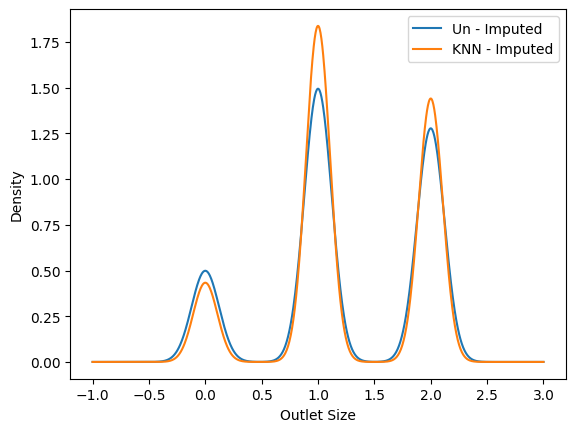

In [35]:
df_train.Outlet_Size.plot(kind="kde")
knn_impute_df_train.Outlet_Size.plot(kind="kde")
plt.legend(["Un - Imputed", "KNN - Imputed"])
plt.xlabel("Outlet Size")

In [36]:
# Function to impute data using mean & mode method
#Item_Weight is a continues variable.Mean
#Outlet_Size is a discrete variable.Mode
def m_impute(df_train):
    m_impute_df_train = df_train.copy()  # Make a copy of dataframe for imputation
    m_impute_df_train["Item_Weight"] = m_impute_df_train["Item_Weight"].fillna(
        m_impute_df_train["Item_Weight"].mean()
    )
    m_impute_df_train["Outlet_Size"] = m_impute_df_train["Outlet_Size"].fillna(
        m_impute_df_train["Outlet_Size"].mode()[0]
    )
    return m_impute_df_train


In [37]:
# Performing imputation on training and testing data using Mean Mode method
m_impute_df_train = m_impute(df_train)  # Imputing Training Data
m_impute_df_test = m_impute(df_test)  # Imputing Testing Data

In [38]:
print(m_impute_df_train.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


Text(0.5, 0, 'Item Weight')

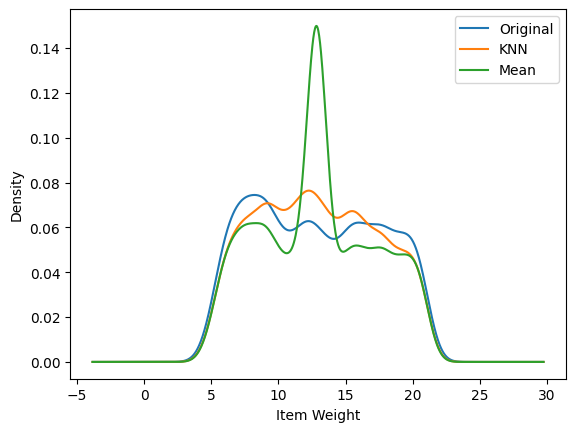

In [40]:
# Statistical Difference in Item Weight after KNN Imputation and Mean Mode Imputation
df_train.Item_Weight.plot(kind="kde")
knn_impute_df_train.Item_Weight.plot(kind="kde")
m_impute_df_train.Item_Weight.plot(kind="kde")
plt.legend(["Original", "KNN", "Mean"])
plt.xlabel("Item Weight")

Text(0.5, 0, 'Outlet Size')

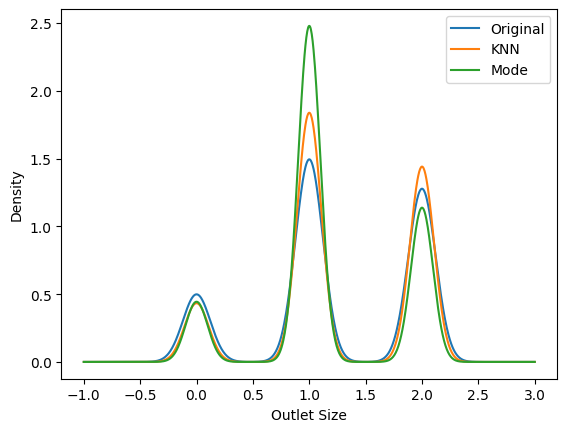

In [41]:
# Statistical Difference in Outlet Size after KNN Imputationa and Mean Mode Imputation
df_train.Outlet_Size.plot(kind="kde")
knn_impute_df_train.Outlet_Size.plot(kind="kde")
m_impute_df_train.Outlet_Size.plot(kind="kde")
plt.legend(["Original", "KNN", "Mode"])
plt.xlabel("Outlet Size")

In [43]:
def encode_oneHot(df):
    df_one_hot = pd.get_dummies(
        df,
        columns=[
            "Item_Fat_Content",
            "Item_Type",
            "Outlet_Identifier",
            "Outlet_Size",
            "Outlet_Location_Type",
            "Outlet_Type",
        ],
    )
    return df_one_hot

In [44]:
knn_impute_df_train_onehot = encode_oneHot(knn_impute_df_train)
knn_impute_df_test_onehot = encode_oneHot(knn_impute_df_test)

In [45]:
def remove_outliers(df):  # Function to Remove All outliers
    df_removed_outliers = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    return df_removed_outliers


def feature_scaling(df):  # Function to scale all the features
    scaler = MinMaxScaler()
    scaler.fit(df)
    scaled_df = scaler.transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    return scaled_df

In [46]:
# Feature Scaling Training Data
knn_impute_df_train_onehot_scaled = feature_scaling(knn_impute_df_train_onehot)
# Feature Scaling Testing Data
knn_impute_df_test_onehot_scaled = feature_scaling(knn_impute_df_test_onehot)

# Removing outliers from training data
knn_impute_df_train_onehot_no_outlier = remove_outliers(knn_impute_df_train_onehot_scaled)
# Removing outliers from testing data
knn_impute_df_test_onehot_no_outlier = remove_outliers(knn_impute_df_test_onehot_scaled)

In [47]:
knn_impute_df_train_onehot_scaled

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0.0,Item_Fat_Content_1.0,Item_Type_0.0,Item_Type_1.0,...,Outlet_Size_0.0,Outlet_Size_1.0,Outlet_Size_2.0,Outlet_Location_Type_0.0,Outlet_Location_Type_1.0,Outlet_Location_Type_2.0,Outlet_Type_0.0,Outlet_Type_1.0,Outlet_Type_2.0,Outlet_Type_3.0
0,0.100128,0.282525,0.048866,0.927507,0.583333,0.283587,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.005135,0.081274,0.058705,0.072068,1.000000,0.031419,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.424904,0.770765,0.051037,0.468288,0.583333,0.158115,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.719512,0.871986,0.000000,0.640093,0.541667,0.053555,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.832478,0.260494,0.000000,0.095805,0.083333,0.073651,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.237484,0.137541,0.172914,0.777729,0.083333,0.210293,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8519,0.575738,0.227746,0.143069,0.326263,0.708333,0.039529,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8520,0.870988,0.359929,0.107148,0.228492,0.791667,0.088850,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8521,0.437099,0.158083,0.442219,0.304939,1.000000,0.138835,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [48]:
knn_impute_df_train_onehot_no_outlier

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0.0,Item_Fat_Content_1.0,Item_Type_0.0,Item_Type_1.0,...,Outlet_Size_0.0,Outlet_Size_1.0,Outlet_Size_2.0,Outlet_Location_Type_0.0,Outlet_Location_Type_1.0,Outlet_Location_Type_2.0,Outlet_Type_0.0,Outlet_Type_1.0,Outlet_Type_2.0,Outlet_Type_3.0
4,0.832478,0.260494,0.000000,0.095805,0.083333,0.073651,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,0.446727,0.541530,0.038799,0.111923,0.083333,0.023768,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.473684,0.461598,0.388165,0.324587,0.000000,0.305621,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,0.282413,0.693361,0.050815,0.278791,0.708333,0.079925,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,0.635430,0.871986,0.287613,0.664399,0.916667,0.358309,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8510,0.442234,0.550461,0.173152,0.850211,0.791667,0.547689,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8511,0.230424,0.770765,0.082159,0.981760,1.000000,0.319800,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8517,0.249679,0.964275,0.254595,0.626243,0.500000,0.273896,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8518,0.237484,0.137541,0.172914,0.777729,0.083333,0.210293,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [49]:
data_loss= len(knn_impute_df_train_onehot)-len(knn_impute_df_train_onehot_no_outlier)
print("Data loss:",data_loss,"rows")

Data loss: 4893 rows


In [50]:
min_mem_size = 6
run_time = 222

pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

3
Checking whether there is an H2O instance running at http://localhost:41170..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpp2ae1n8y
  JVM stdout: /tmp/tmpp2ae1n8y/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpp2ae1n8y/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:41170
Connecting to H2O server at http://127.0.0.1:41170 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 9 days
H2O_cluster_name:,H2O_from_python_unknownUser_xps805
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [51]:
def autoML(knn_impute_df_train_onehot_scaled, knn_impute_df_test_onehot_scaled):
    h2o_df_train = h2o.H2OFrame(knn_impute_df_train_onehot_scaled)
    h2o_df_test = h2o.H2OFrame(knn_impute_df_test_onehot_scaled)

    # Double Check the shape of Training and Testing Data
    print(h2o_df_train.shape)
    print(h2o_df_test.shape)

    X = h2o_df_train.columns
    y = "Item_Outlet_Sales"

    X.remove(y)  # Removing the result frm our predictors data
    X.remove("Item_Identifier")  # Removing ID from the predictor's data, as it is not related

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(x=X, y=y, training_frame=h2o_df_train)  # Trainig the dataset on different models

    return h2o_df_train, h2o_df_test, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    glm_model = ""
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [52]:
# Training model using Data with Outliers
model_with_outliers = autoML(knn_impute_df_train_onehot_scaled, knn_impute_df_test_onehot_scaled)
best_model_with_outliers = getBestModel(model_with_outliers[2])
print(best_model_with_outliers)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
(8523, 44)
(5681, 43)
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
5
Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20240130_44753


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 40                          28442                  9            15           11.8          49            56            51.625

ModelM

In [53]:
# Training Model after removing outliers from dataset
model_with_no_outliers = autoML(knn_impute_df_train_onehot_no_outlier, knn_impute_df_test_onehot_no_outlier)
best_model_with_no_outliers = getBestModel(model_with_no_outliers[2])
print(best_model_with_no_outliers)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
(3630, 44)
(2410, 43)
AutoML progress: |
04:51:56.485: _train param, Dropping bad and constant columns: [Item_Type_12.0, Item_Type_14.0, Item_Type_15.0, Item_Type_10.0, Outlet_Type_0.0, Item_Type_11.0, Outlet_Identifier_0.0, Item_Type_8.0, Item_Type_7.0, Item_Type_4.0, Item_Type_3.0, Item_Type_2.0, Outlet_Identifier_4.0, Item_Type_1.0, Item_Type_0.0]

███
04:52:05.800: _train param, Dropping bad and constant columns: [Item_Type_12.0, Item_Type_14.0, Item_Type_15.0, Item_Type_10.0, Outlet_Type_0.0, Item_Type_11.0, Outlet_Identifier_0.0, Item_Type_8.0, Item_Type_7.0, Item_Type_4.0, Item_Type_3.0, Item_Type_2.0, Outlet_Identifier_4.0, Item_Type_1.0, Item_Type_0.0]

█
04:52:07.884: _train param, Dropping bad and constant columns: [Item_Type_12.0, Item_Type_14.0, Item_Type_15.0, Item_Type_10.0, Outlet_Ty

Question 11.  Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Answer:

* In your dataset, you initially identified and removed outliers, specifically data points with Z-Scores exceeding 3. However, upon further analysis and model training, it became evident that this outlier removal step did not lead to an improvement in model performance.

* The comparison of two datasets, one with outliers removed and the other without, revealed that the dataset with outliers removed had a significantly reduced sample size. This substantial loss of data was found to be detrimental to the model's predictive capabilities.

* In conclusion, the decision to remove outliers ultimately resulted in a model with poorer evaluation metrics. This underscores the importance of carefully assessing the impact of outlier removal on your specific dataset and considering the trade-off between data loss and model performance improvement.

Question 4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Question 8.  Which predictor variables are the most important?

Answer:


Useful Predictors:

* Item_MRP

* Outlet_Type_0.0

* Outlet_Type_3.0

* Outlet_Identifier_5.0

* Outlet_Establishment_Year

* Item_Weight

* Item_Visibility

* Outlet_Identifier_4.0

* Outlet_Identifier_0.0

* Outlet_Size_2.0

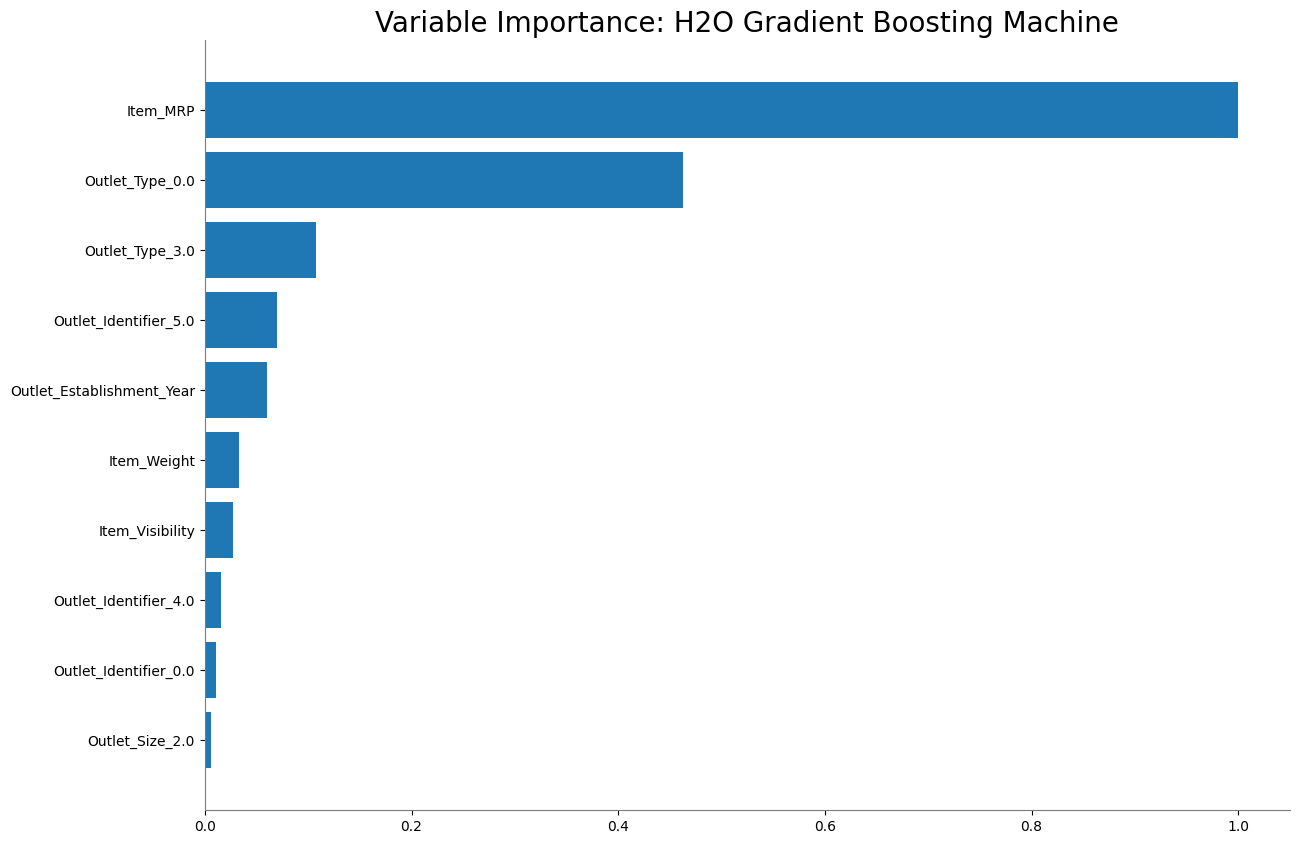

<Figure size 640x480 with 0 Axes>

In [54]:
best_model_with_outliers.varimp_plot()

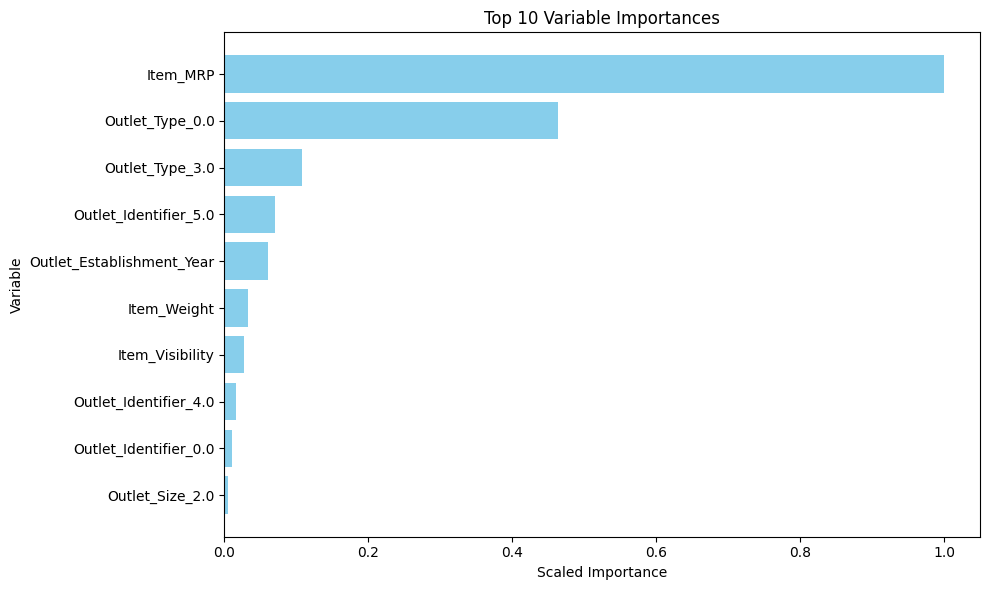

In [55]:
coeff_table = best_model_with_outliers._model_json["output"]["variable_importances"]
coeff_table_df = coeff_table.as_data_frame()

# Sort the DataFrame by scaled importance in descending order
sorted_coeff_table_df = coeff_table_df.sort_values(by='scaled_importance', ascending=False)

# Select the top 10 variables
top_10_variables = sorted_coeff_table_df.head(10)

# Create a bar plot for the top 10 variables
plt.figure(figsize=(10, 6))
plt.barh(top_10_variables['variable'], top_10_variables['scaled_importance'], color='skyblue')
plt.xlabel('Scaled Importance')
plt.ylabel('Variable')
plt.title('Top 10 Variable Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important variables at the top
plt.tight_layout()
plt.show()

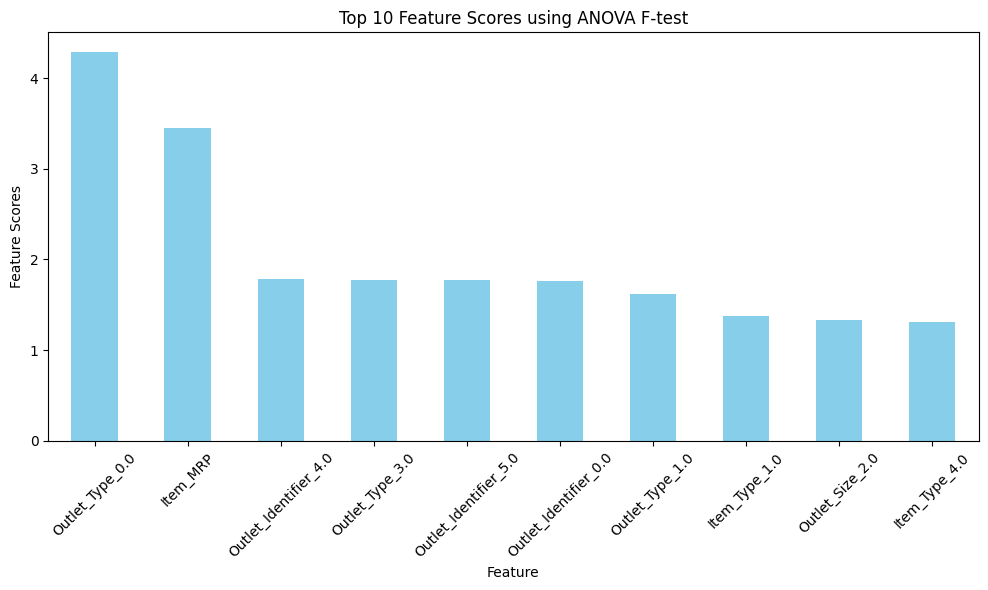

In [56]:
X = pd.get_dummies(knn_impute_df_train_onehot.drop(columns=['Item_Outlet_Sales']))
y = knn_impute_df_train_onehot['Item_Outlet_Sales']


# Initialize SelectKBest with f_classif scoring function
selector = SelectKBest(score_func=f_classif, k='all')

# Fit selector to the data
selector.fit(X, y)

# Get feature scores
feature_scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
top_10_features = feature_scores.head(10)

# Create a bar plot to visualize the top 10 feature scores
plt.figure(figsize=(10, 6))
top_10_features.plot(kind='bar', color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Feature Scores')
plt.title('Top 10 Feature Scores using ANOVA F-test')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Ensure proper layout and spacing
plt.show()  # Display the bar plot

Question 12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

Answer:

* After conducting an analysis of the % residual error (Bias and Variance) for all three methods on three different datasets, we have observed that KNN imputation consistently outperforms the other methods in terms of data imputation. This suggests that KNN imputation is the most effective approach for imputing data on your specific dataset.

In [57]:
df_train_selected = df_train[~df_train["Item_Weight"].isnull()]
df_train_selected = df_train_selected[~df_train_selected["Outlet_Size"].isnull()]

In [58]:
df_train_selected.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [59]:
df_train_selected = feature_scaling(df_train_selected)

In [64]:
# Creating three extra coloumns of Item_Weight for performing Data Imputation techniques
df_train_selected["Item_Weight_1_percent"] = df_train_selected[["Item_Weight"]]
df_train_selected["Item_Weight_5_percent"] = df_train_selected[["Item_Weight"]]
df_train_selected["Item_Weight_10_percent"] = df_train_selected[["Item_Weight"]]

In [65]:
df_train_selected

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_1_percent,Item_Weight_5_percent,Item_Weight_10_percent
0,0.100128,0.282525,0.0,0.085212,0.266667,0.927446,1.000,0.545455,0.5,0.0,0.0,0.359846,0.282525,0.282525,0.282525
1,0.005135,0.081274,1.0,0.102368,0.933333,0.071280,0.250,1.000000,0.5,1.0,1.0,0.036730,0.081274,0.081274,0.081274
2,0.424904,0.770765,0.0,0.088997,0.666667,0.467837,1.000,0.545455,0.5,0.0,0.0,0.199072,0.770765,0.770765,0.770765
3,0.832478,0.260494,0.0,0.000000,0.600000,0.095036,0.000,0.000000,0.0,1.0,0.0,0.090844,0.260494,0.260494,0.260494
4,0.486521,0.347723,1.0,0.000000,0.000000,0.084583,0.250,1.000000,0.5,1.0,1.0,0.047840,0.347723,0.347723,0.347723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,0.249679,0.964275,1.0,0.443954,0.333333,0.625925,0.875,0.454545,1.0,0.0,0.0,0.347428,0.964275,0.964275,0.964275
4646,0.237484,0.137541,0.0,0.301522,0.866667,0.777541,0.000,0.000000,0.0,1.0,0.0,0.265930,0.137541,0.137541,0.137541
4647,0.870988,0.359929,0.0,0.186840,0.533333,0.227837,0.625,0.772727,1.0,0.5,0.0,0.110320,0.359929,0.359929,0.359929
4648,0.437099,0.158083,1.0,0.771127,0.866667,0.304349,0.250,1.000000,0.5,1.0,1.0,0.174368,0.158083,0.158083,0.158083


In [66]:
total=df_train_selected.isnull().sum()
percent=(df_train_selected.isnull().sum()/df_train_selected.isnull().count()*100)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Item_Identifier,0,0.0
Item_Weight,0,0.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0
Outlet_Identifier,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Size,0,0.0
Outlet_Location_Type,0,0.0


In [67]:
# Function to create missing values
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac=percent).index, col] = np.nan


# Modified function to impute data using mean imputation
def mean_impute(df_train):
    mm_impute_df_train = df_train.copy()  # Make a copy of dataframe for imputation
    mm_impute_df_train["Item_Weight_1_percent"] = mm_impute_df_train["Item_Weight_1_percent"].fillna(mm_impute_df_train["Item_Weight"].mean())
    mm_impute_df_train["Item_Weight_5_percent"] = mm_impute_df_train["Item_Weight_5_percent"].fillna(mm_impute_df_train["Item_Weight"].mean())
    mm_impute_df_train["Item_Weight_10_percent"] = mm_impute_df_train["Item_Weight_10_percent"].fillna(mm_impute_df_train["Item_Weight"].mean())
    return mm_impute_df_train


# Function to calculate how well the data has been recovered after performing data imputation
def percentage_change(l1, l2):
    percent_change = abs(l2 - l1) / (l1 + 0.000000001)
    avg_change = (percent_change.sum() / percent_change.count()) * 100
    return avg_change

In [68]:
create_missing(df_train_selected, 0.01, "Item_Weight_1_percent")
create_missing(df_train_selected, 0.05, "Item_Weight_5_percent")
create_missing(df_train_selected, 0.1, "Item_Weight_10_percent")

In [69]:
total=df_train_selected.isnull().sum()
percent=(df_train_selected.isnull().sum()/df_train_selected.isnull().count()*100)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Item_Identifier,0,0.000000
Item_Weight,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Size,0,0.000000
Outlet_Location_Type,0,0.000000


In [70]:
# Imputing data using KNN imputation
knn_imputed_df_train_selected = knn_impute(df_train_selected)

Imputing row 1/4650 with 0 missing, elapsed time: 4.475
Imputing row 101/4650 with 1 missing, elapsed time: 4.477
Imputing row 201/4650 with 0 missing, elapsed time: 4.478
Imputing row 301/4650 with 0 missing, elapsed time: 4.479
Imputing row 401/4650 with 0 missing, elapsed time: 4.481
Imputing row 501/4650 with 0 missing, elapsed time: 4.482
Imputing row 601/4650 with 1 missing, elapsed time: 4.483
Imputing row 701/4650 with 1 missing, elapsed time: 4.484
Imputing row 801/4650 with 0 missing, elapsed time: 4.485
Imputing row 901/4650 with 0 missing, elapsed time: 4.487
Imputing row 1001/4650 with 0 missing, elapsed time: 4.489
Imputing row 1101/4650 with 1 missing, elapsed time: 4.490
Imputing row 1201/4650 with 0 missing, elapsed time: 4.492
Imputing row 1301/4650 with 1 missing, elapsed time: 4.493
Imputing row 1401/4650 with 0 missing, elapsed time: 4.495
Imputing row 1501/4650 with 0 missing, elapsed time: 4.496
Imputing row 1601/4650 with 0 missing, elapsed time: 4.498
Imputing 

In [71]:
total=knn_imputed_df_train_selected.isnull().sum()
percent=(knn_imputed_df_train_selected.isnull().sum()/knn_imputed_df_train_selected.isnull().count()*100)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Item_Identifier,0,0.0
Item_Weight,0,0.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0
Outlet_Identifier,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Size,0,0.0
Outlet_Location_Type,0,0.0


In [72]:
# Performing Mean Imputation
mm_imputed_df_train_selected = mean_impute(df_train_selected)

In [73]:
total=mm_imputed_df_train_selected.isnull().sum()
percent=(mm_imputed_df_train_selected.isnull().sum()/mm_imputed_df_train_selected.isnull().count()*100)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Item_Identifier,0,0.0
Item_Weight,0,0.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0
Outlet_Identifier,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Size,0,0.0
Outlet_Location_Type,0,0.0


For MICE imputation, we have to be carefull and create three different dataframes, because MICE imputation uses all features in the data to predict(impute) the missing value. Having all coloumns in one dataframe can lead to the issue of co-linearity.

In [74]:
#perform MICE imputation:
# Function to impute data using MICE method
def mice_impute(train_df):
    mice_imputed_train_df = pd.DataFrame(
        MICE().fit_transform(train_df), columns=list(train_df.columns)
    )
    mice_imputed_train_df["Outlet_Size"] = mice_imputed_train_df[
        "Outlet_Size"
    ].round()  # Fixing Categorical Values - Outlet Size
    return mice_imputed_train_df

In [77]:
# Dataframe for 1% missing value
df_train_selected_1_percent = df_train_selected.drop(
    ["Item_Weight", "Item_Weight_5_percent", "Item_Weight_10_percent"], axis=1
)
# Dataframe for 5% missing value
df_train_selected_5_percent = df_train_selected.drop(
    ["Item_Weight", "Item_Weight_1_percent", "Item_Weight_10_percent"], axis=1
)
# Dataframe for 10% missing value
df_train_selected_10_percent = df_train_selected.drop(
    ["Item_Weight", "Item_Weight_1_percent", "Item_Weight_5_percent"], axis=1
)

# Performing Imputation on Dataframe with 1% missing values
imputed_df_train_selected_1_percent = mice_impute(df_train_selected_1_percent)
# Performing Imputation on Dataframe with 5% missing values
imputed_df_train_selected_5_percent = mice_impute(df_train_selected_5_percent)
# Performing Imputation on Dataframe with 10% missing values
imputed_df_train_selected_10_percent = mice_impute(df_train_selected_10_percent)

In [87]:
total=imputed_df_train_selected_1_percent.isnull().sum()
percent=(imputed_df_train_selected_1_percent.isnull().sum()/imputed_df_train_selected_1_percent.isnull().count()*100)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Item_Identifier,0,0.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0
Outlet_Identifier,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Size,0,0.0
Outlet_Location_Type,0,0.0
Outlet_Type,0,0.0


In [88]:
total=imputed_df_train_selected_5_percent.isnull().sum()
percent=(imputed_df_train_selected_5_percent.isnull().sum()/imputed_df_train_selected_5_percent.isnull().count()*100)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Item_Identifier,0,0.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0
Outlet_Identifier,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Size,0,0.0
Outlet_Location_Type,0,0.0
Outlet_Type,0,0.0


In [89]:
total=imputed_df_train_selected_10_percent.isnull().sum()
percent=(imputed_df_train_selected_10_percent.isnull().sum()/imputed_df_train_selected_10_percent.isnull().count()*100)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Item_Identifier,0,0.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0
Outlet_Identifier,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Size,0,0.0
Outlet_Location_Type,0,0.0
Outlet_Type,0,0.0


In [78]:
# This is the average % error on residuals for 1% missing data imputed using KNN
print("Average % error on residuals for 1% missing data imputed using KNN")
print(percentage_change(knn_imputed_df_train_selected["Item_Weight"],knn_imputed_df_train_selected["Item_Weight_1_percent"],))

Average % error on residuals for 1% missing data imputed using KNN
0.7333728651209497


In [79]:
# This is the average % error on residuals for 1% missing data imputed using Mean Imputation
print("Average % error on residuals for 1% missing data imputed using Mean Imputation")
print(percentage_change(mm_imputed_df_train_selected["Item_Weight"],mm_imputed_df_train_selected["Item_Weight_1_percent"],))


Average % error on residuals for 1% missing data imputed using Mean Imputation
1.1461400127401011


In [80]:
# This is the average % error on residuals for 1% missing data imputed using MICE Imputation
print("Average % error on residuals for 1% missing data imputed using MICE Imputation")
print(percentage_change(df_train_selected["Item_Weight"],imputed_df_train_selected_1_percent["Item_Weight_1_percent"],))

Average % error on residuals for 1% missing data imputed using MICE Imputation
1.1468113236414883


In [81]:
# This is the average % error on residuals for 5% missing data imputed using KNN
print("Average % error on residuals for 5% missing data imputed using KNN")
print(percentage_change(knn_imputed_df_train_selected["Item_Weight"],knn_imputed_df_train_selected["Item_Weight_5_percent"],))

Average % error on residuals for 5% missing data imputed using KNN
2.9037406524710017


In [82]:
# This is the average % error on residuals for 5% missing data imputed using Mean Imputation
print("Average % error on residuals for 5% missing data imputed using Mean Imputation")
print(percentage_change(mm_imputed_df_train_selected["Item_Weight"],mm_imputed_df_train_selected["Item_Weight_5_percent"],))

Average % error on residuals for 5% missing data imputed using Mean Imputation
6.016565949661321


In [83]:
# This is the average % error on residuals for 5% missing data imputed using MICE Imputation
print("Average % error on residuals for 5% missing data imputed using MICE Imputation")
print(percentage_change(df_train_selected["Item_Weight"],imputed_df_train_selected_5_percent["Item_Weight_5_percent"],))

Average % error on residuals for 5% missing data imputed using MICE Imputation
6.033721563271109


In [84]:
# This is the average % error on residuals for 10% missing data imputed using KNN Imputation
print("Average % error on residuals for 10% missing data imputed using KNN Imputation")
print(percentage_change(knn_imputed_df_train_selected["Item_Weight"],knn_imputed_df_train_selected["Item_Weight_10_percent"],))

Average % error on residuals for 10% missing data imputed using KNN Imputation
13.340209926528205


In [85]:
# This is the average % error on residuals for 10% missing data imputed using Mean Imputation
print("Average % error on residuals for 10% missing data imputed using Mean Imputation")
print(percentage_change(mm_imputed_df_train_selected["Item_Weight"],mm_imputed_df_train_selected["Item_Weight_10_percent"],))


Average % error on residuals for 10% missing data imputed using Mean Imputation
21.619363643572807


In [86]:
# This is the average % error on residuals for 10% missing data imputed using MICE Imputation
print("Average % error on residuals for 10% missing data imputed using MICE Imputation")
print(percentage_change(df_train_selected["Item_Weight"],imputed_df_train_selected_10_percent["Item_Weight_10_percent"],))

Average % error on residuals for 10% missing data imputed using MICE Imputation
21.478033890828577
